## Section 3: Bivariate and Multivariate Analysis

In this section, we expand our exploration by looking at bivariate and multivariate analysis.  By including more than one variable, it may help provide additional insight into why certain demographics were affected more by COVID-19 when it comes to school enrollment than others.

In [1]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)
library(maps)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Load in the dataframe from our saved .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

Warning message:
“Using size for a discrete variable is not advised.”

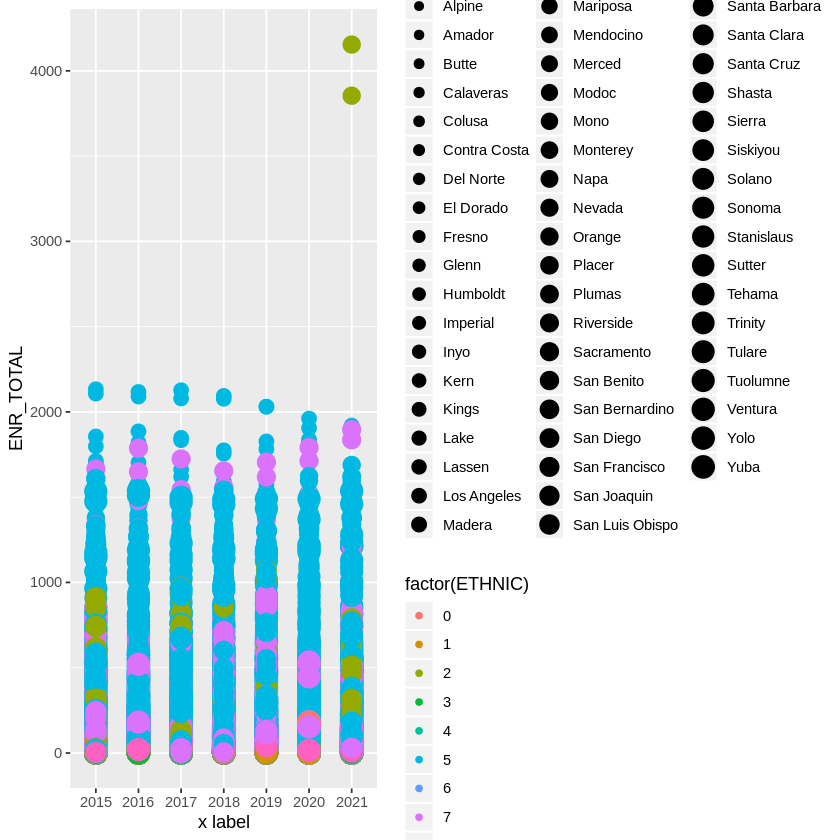

In [3]:
##trying a multivariate graph to see what it shows

options(scipen=999)  

ggplot(df,
       aes(x=Year,        # independent variable, feature 1
           y=ENR_TOTAL,              # dependent variable, feature 2
           color=factor(ETHNIC),  # independent variable, feature 3
           size=COUNTY),      # independent variable, feature 4
           ) + geom_point() + xlab("x label") +
       ylab("ENR_TOTAL") 


In [4]:
##investigating outliers

head(df %>% select(SCHOOL, DISTRICT, COUNTY, ETHNIC,ENR_TOTAL,Year) %>% filter(ETHNIC=="2", Year==2021) %>% arrange(desc(ENR_TOTAL)))


SCHOOL,DISTRICT,COUNTY,ETHNIC,ENR_TOTAL,Year
<fct>,<fct>,<fct>,<int>,<int>,<fct>
Alternative Education-San Joaquin High,Irvine Unified,Orange,2,4154,2021
Alternative Education-San Joaquin High,Irvine Unified,Orange,2,3854,2021
Dougherty Valley High,San Ramon Valley Unified,Contra Costa,2,1242,2021
Dougherty Valley High,San Ramon Valley Unified,Contra Costa,2,1168,2021
Evergreen Valley High,East Side Union High,Santa Clara,2,1073,2021
Evergreen Valley High,East Side Union High,Santa Clara,2,1066,2021


In [5]:
#Total Orange County shows a drop - so why those two outliers?
Orange_County_Asian <- df %>%
filter(ETHNIC=="2", COUNTY=="Orange", DISTRICT=="Irvine Unified") %>%
select(ENR_TOTAL, Year, DISTRICT) %>%
group_by(DISTRICT, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL))
Orange_County_Asian

DISTRICT,Year,Total_Enroll
<fct>,<fct>,<int>
Irvine Unified,2015,14130
Irvine Unified,2016,14826
Irvine Unified,2017,15500
Irvine Unified,2018,16313
Irvine Unified,2019,16854
Irvine Unified,2020,17429
Irvine Unified,2021,17155


In [6]:
#Total Orange County shows a drop - so why those two outliers?
Orange_County_Asian <- df %>%
filter(ETHNIC=="2", COUNTY=="Orange") %>%
select(ENR_TOTAL, Year, COUNTY) %>%
group_by(COUNTY, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL))
Orange_County_Asian

COUNTY,Year,Total_Enroll
<fct>,<fct>,<int>
Orange,2015,75973
Orange,2016,76879
Orange,2017,78154
Orange,2018,79553
Orange,2019,79690
Orange,2020,80096
Orange,2021,79233


In [7]:
Orange_County <- df %>%
filter(ETHNIC=="2", COUNTY=="Orange") %>%
select(SCHOOL, ENR_TOTAL, Year, COUNTY) %>%
group_by(SCHOOL, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)
Orange_County_2021 = Orange_County %>% filter(Year == 2021)
head(Orange_County_2021 %>% arrange(desc(Percent_Change)))


SCHOOL,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Alternative Education-San Joaquin High,2021,8008,66633.333
Monte Vista High,2021,125,12400.000
Polaris High (Alternative),2021,118,1585.714
SVUSD Virtual Academy (Alternative),2021,18,800.000
Sycamore Creek Community Charter,2021,7,600.000
International School for Science and Culture,2021,25,400.000


In [8]:
df %>% select(SCHOOL, ETHNIC,ENR_TOTAL,Year) %>% filter(ETHNIC=="2", SCHOOL=="Alternative Education-San Joaquin High") 

SCHOOL,ETHNIC,ENR_TOTAL,Year
<fct>,<int>,<int>,<fct>
Alternative Education-San Joaquin High,2,13,2015
Alternative Education-San Joaquin High,2,8,2015
Alternative Education-San Joaquin High,2,9,2016
Alternative Education-San Joaquin High,2,4,2016
Alternative Education-San Joaquin High,2,6,2017
Alternative Education-San Joaquin High,2,8,2017
Alternative Education-San Joaquin High,2,6,2018
Alternative Education-San Joaquin High,2,6,2018
Alternative Education-San Joaquin High,2,6,2019


Findings: Alternative Education-San Joaquin High Shows a drastic increase in 2021 - additional datasets are needed in order to understand why

In [9]:
#filter for total enrollment and percent changes dependent on both grade and ethnic groups 
grade_and_ethnic = df %>% select(c(5,7:15,17:20, 24)) %>% group_by(ETHNIC, Year) %>% summarize_all(sum) %>%
gather(Grade, Total, KDGN:GR_12) %>%
mutate(Percent_Change = (Total/lag(Total)-1)*100)

head(grade_and_ethnic)

ETHNIC,Year,Grade,Total,Percent_Change
<int>,<fct>,<chr>,<int>,<dbl>
0,2015,KDGN,6236,NA
0,2016,KDGN,5974,-4.201411
0,2017,KDGN,7243,21.242049
0,2018,KDGN,7630,5.343090
0,2019,KDGN,7251,-4.967235
0,2020,KDGN,7705,6.261205


Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Removed 9 rows containing missing values (geom_point).”

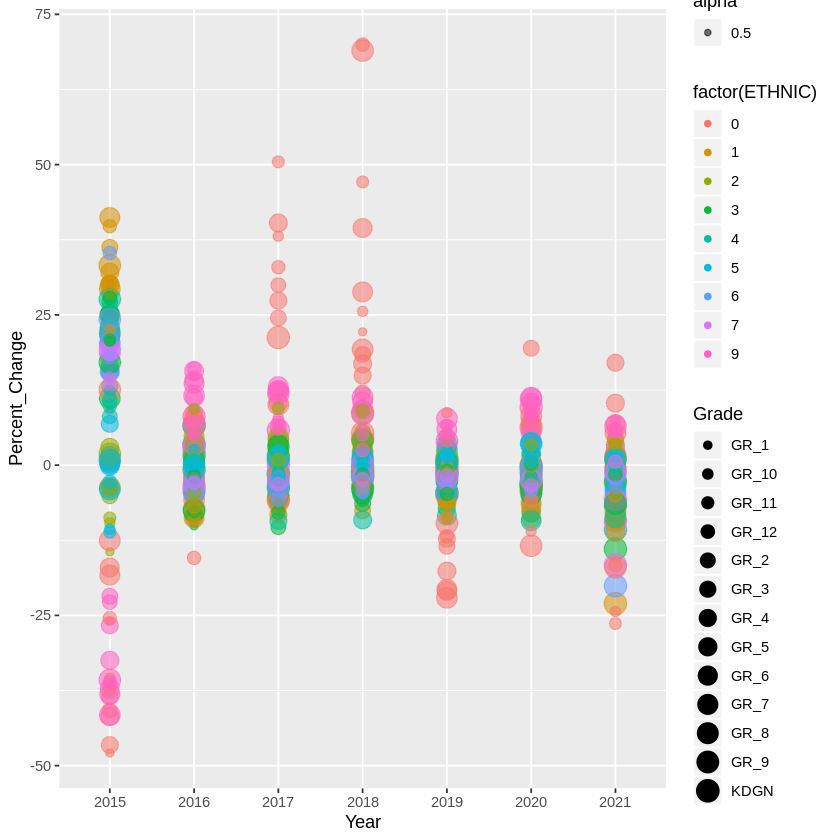

In [10]:
#plot changes based on both grade and ethnic groups 
ggplot(grade_and_ethnic, aes(Year, Percent_Change, color=factor(ETHNIC), size=Grade, alpha=0.5)) + geom_point() 

In [11]:
#filter for only the year 2021 to more closely observe the trends
grade_and_ethnic_21 <- filter(grade_and_ethnic, Year=='2021') 
head(grade_and_ethnic_21)

ETHNIC,Year,Grade,Total,Percent_Change
<int>,<fct>,<chr>,<int>,<dbl>
0,2021,KDGN,7264,-5.723556
1,2021,KDGN,1881,-23.036007
2,2021,KDGN,46201,-2.832927
3,2021,KDGN,1702,-13.953488
4,2021,KDGN,9709,-6.742868
5,2021,KDGN,254830,-10.740994


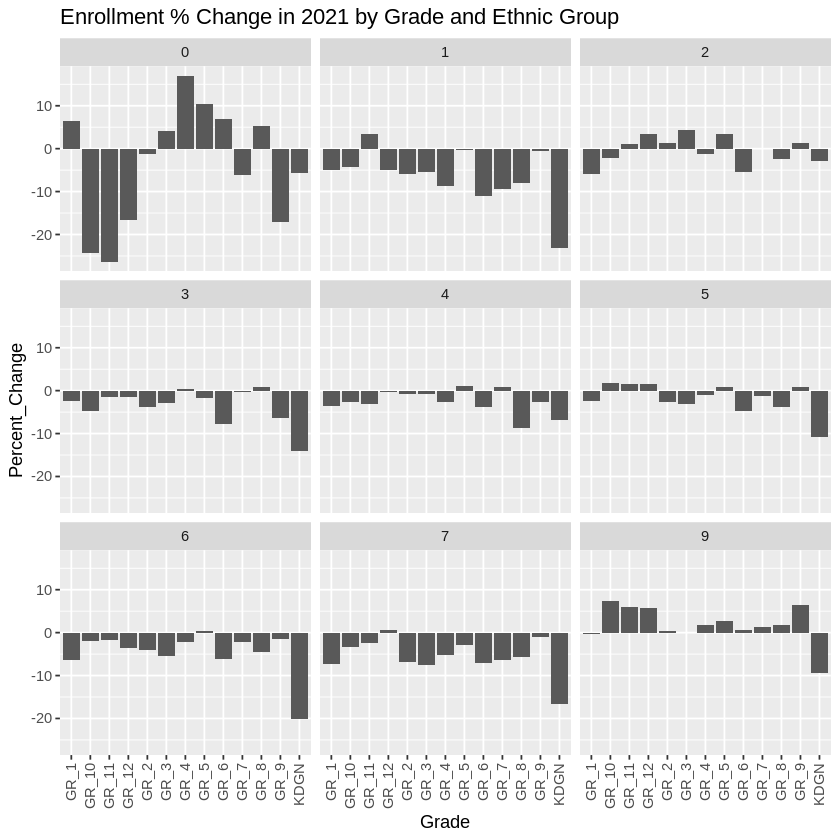

In [12]:
# plot the changes in enrollment per grade and faceted by ethnic group
ggplot(grade_and_ethnic_21, aes(Grade, Percent_Change)) + 
geom_bar(stat='identity') + facet_wrap(~ETHNIC) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
ggtitle('Enrollment % Change in 2021 by Grade and Ethnic Group')

Interesting to note that the trend with kindergarten decreasing seems to be the same across ethnic groups. Trends for other years seem to differ per ethnic group, with the younger years typically decreasing in enrollment.

In [14]:
#Save our dataframe to an Rda file
saveRDS(df,file="Group7DataFrame.Rda")